In [37]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import pickle
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8.27)})
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL

import ruptures as rpt
import pyhomogeneity as hg

In [2]:
# Dataframe containing 2010/2011 data for all rows, including imputed dates
df_2010_11_padded = pd.read_csv("../data/wrangled_data/df_with_padding.csv")

df_2010_11_total_sales = pd.read_csv("../data/wrangled_data/df_total_sales.csv")

df_2010_11 = pd.read_csv("../data/wrangled_data/df_2010_11.csv")

## Initial timseries-date plots by "Store" and by "Dept"/

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

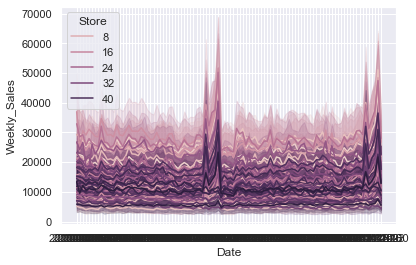

In [7]:
sns.lineplot(x="Date", y="Weekly_Sales", hue="Store", markers=False, data=df_2010_11_padded)

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

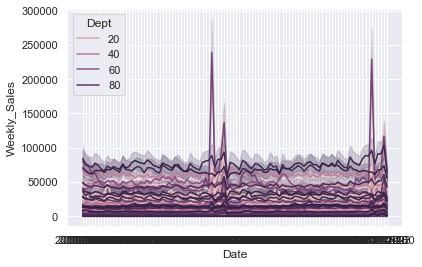

In [8]:
sns.lineplot(x="Date", y="Weekly_Sales", hue="Dept", markers=False, data=df_2010_11_padded)

## Similar plot, but this time with total sales for each store. 

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

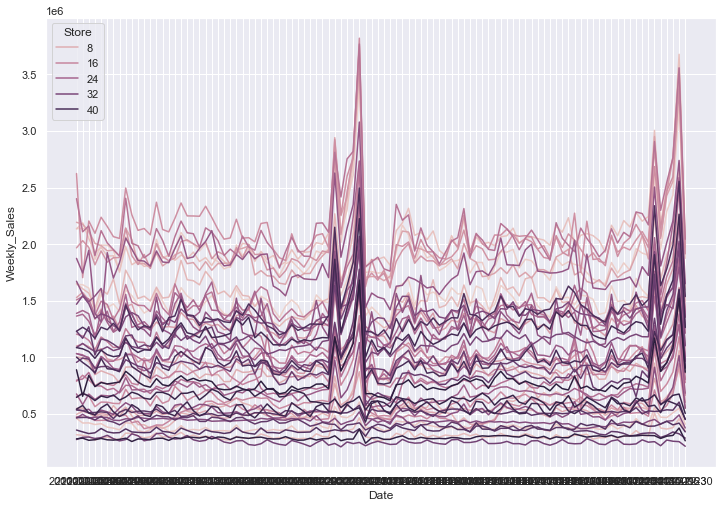

In [5]:
sns.lineplot(x="Date", y="Weekly_Sales", hue="Store", markers=False, data=df_2010_11_total_sales)

# Taking a closer look at the Store Types and Departments.

# Line plot by Store type:
* Can already see end-of-year seasonality for at least A and B
* Not clear for C
* A consistently higher sales

In [10]:
df_2010_11_total_sales['Date'] = pd.to_datetime(df_2010_11_total_sales["Date"], format="%Y/%m/%d")

Type
A    AxesSubplot(0.125,0.2;0.775x0.68)
B    AxesSubplot(0.125,0.2;0.775x0.68)
C    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Weekly_Sales, dtype: object

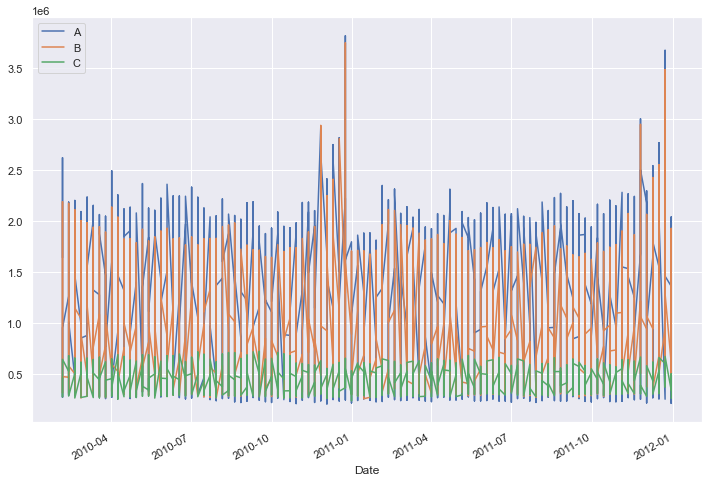

In [11]:
df_2010_11_total_sales.set_index('Date', inplace=True)
df_2010_11_total_sales.groupby('Type')['Weekly_Sales'].plot(kind="line", legend=True)

## Plot Weekly_Sales by idividual store for each type (A,B,C)

In [12]:
df_2010_11['Date'] = pd.to_datetime(df_2010_11["Date"], format="%Y/%m/%d")
df_2010_11_A = df_2010_11[df_2010_11['Type'] == "A"]
df_2010_11_A.set_index("Date", inplace=True)

Store
1     AxesSubplot(0.125,0.2;0.775x0.68)
2     AxesSubplot(0.125,0.2;0.775x0.68)
4     AxesSubplot(0.125,0.2;0.775x0.68)
6     AxesSubplot(0.125,0.2;0.775x0.68)
8     AxesSubplot(0.125,0.2;0.775x0.68)
11    AxesSubplot(0.125,0.2;0.775x0.68)
13    AxesSubplot(0.125,0.2;0.775x0.68)
14    AxesSubplot(0.125,0.2;0.775x0.68)
19    AxesSubplot(0.125,0.2;0.775x0.68)
20    AxesSubplot(0.125,0.2;0.775x0.68)
24    AxesSubplot(0.125,0.2;0.775x0.68)
26    AxesSubplot(0.125,0.2;0.775x0.68)
27    AxesSubplot(0.125,0.2;0.775x0.68)
28    AxesSubplot(0.125,0.2;0.775x0.68)
31    AxesSubplot(0.125,0.2;0.775x0.68)
32    AxesSubplot(0.125,0.2;0.775x0.68)
33    AxesSubplot(0.125,0.2;0.775x0.68)
34    AxesSubplot(0.125,0.2;0.775x0.68)
36    AxesSubplot(0.125,0.2;0.775x0.68)
39    AxesSubplot(0.125,0.2;0.775x0.68)
40    AxesSubplot(0.125,0.2;0.775x0.68)
41    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Weekly_Sales, dtype: object

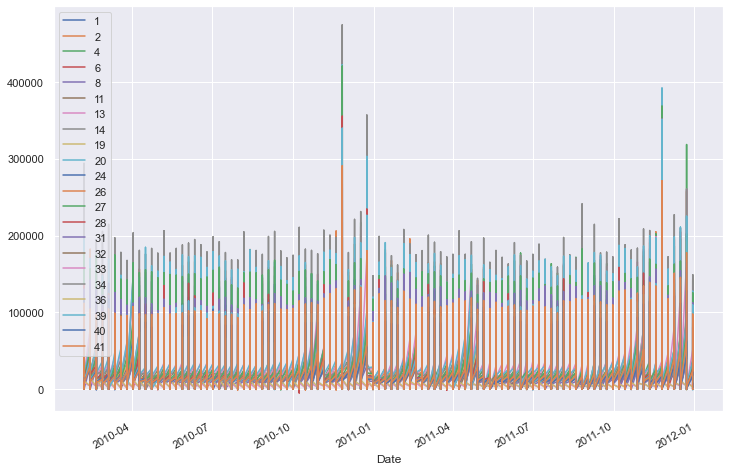

In [14]:
df_2010_11_A.groupby('Store')['Weekly_Sales'].plot(kind="line", legend=True)

Store
3     AxesSubplot(0.125,0.2;0.775x0.68)
5     AxesSubplot(0.125,0.2;0.775x0.68)
7     AxesSubplot(0.125,0.2;0.775x0.68)
9     AxesSubplot(0.125,0.2;0.775x0.68)
10    AxesSubplot(0.125,0.2;0.775x0.68)
12    AxesSubplot(0.125,0.2;0.775x0.68)
15    AxesSubplot(0.125,0.2;0.775x0.68)
16    AxesSubplot(0.125,0.2;0.775x0.68)
17    AxesSubplot(0.125,0.2;0.775x0.68)
18    AxesSubplot(0.125,0.2;0.775x0.68)
21    AxesSubplot(0.125,0.2;0.775x0.68)
22    AxesSubplot(0.125,0.2;0.775x0.68)
23    AxesSubplot(0.125,0.2;0.775x0.68)
25    AxesSubplot(0.125,0.2;0.775x0.68)
29    AxesSubplot(0.125,0.2;0.775x0.68)
35    AxesSubplot(0.125,0.2;0.775x0.68)
45    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Weekly_Sales, dtype: object

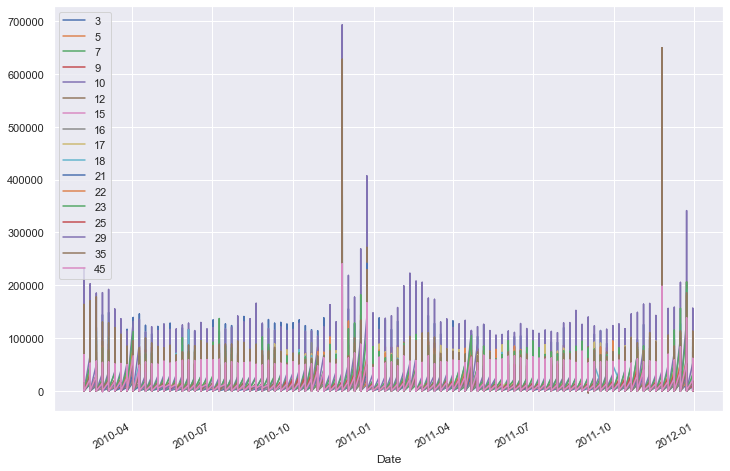

In [15]:
df_2010_11_B = df_2010_11[df_2010_11['Type'] == "B"]
df_2010_11_B.set_index("Date", inplace=True)

df_2010_11_B.groupby('Store')['Weekly_Sales'].plot(kind="line", legend=True)

# Store type C (below) does not display the kind of seasonality obvious in the other stores.

Store
30    AxesSubplot(0.125,0.2;0.775x0.68)
37    AxesSubplot(0.125,0.2;0.775x0.68)
38    AxesSubplot(0.125,0.2;0.775x0.68)
42    AxesSubplot(0.125,0.2;0.775x0.68)
43    AxesSubplot(0.125,0.2;0.775x0.68)
44    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Weekly_Sales, dtype: object

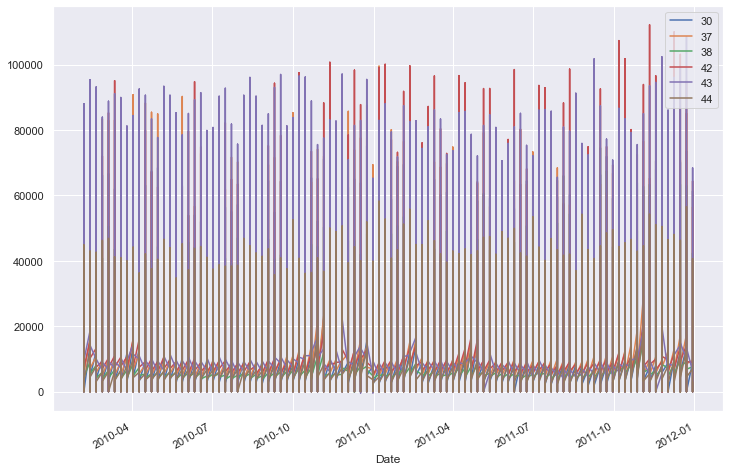

In [16]:
df_2010_11_C = df_2010_11[df_2010_11['Type'] == "C"]
df_2010_11_C.set_index("Date", inplace=True)

df_2010_11_C.groupby('Store')['Weekly_Sales'].plot(kind="line", legend=True)

# Line plot by Department type:
* Difficult to make any clear inferences with so many departments
* Clearly 1 has massive end of year spike in sales

Dept
1     AxesSubplot(0.125,0.2;0.775x0.68)
2     AxesSubplot(0.125,0.2;0.775x0.68)
3     AxesSubplot(0.125,0.2;0.775x0.68)
4     AxesSubplot(0.125,0.2;0.775x0.68)
5     AxesSubplot(0.125,0.2;0.775x0.68)
                    ...                
95    AxesSubplot(0.125,0.2;0.775x0.68)
96    AxesSubplot(0.125,0.2;0.775x0.68)
97    AxesSubplot(0.125,0.2;0.775x0.68)
98    AxesSubplot(0.125,0.2;0.775x0.68)
99    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Weekly_Sales, Length: 81, dtype: object

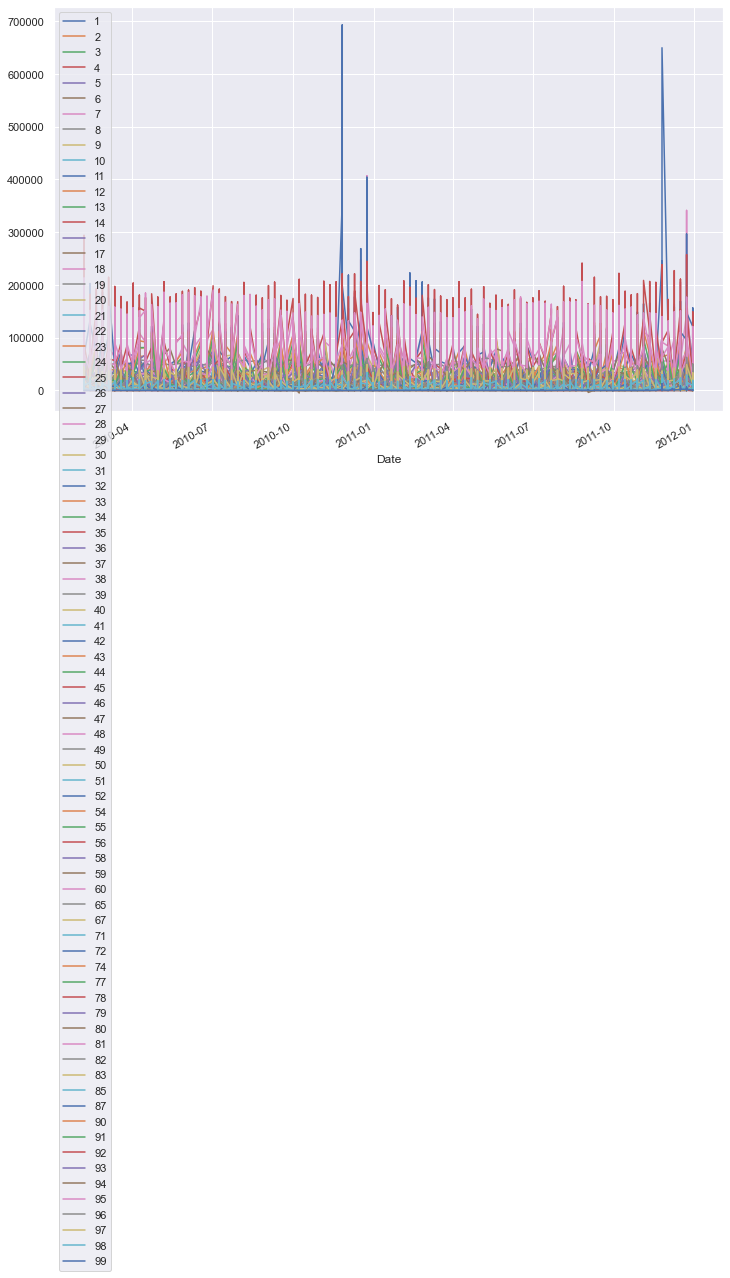

In [19]:
df_dept = df_2010_11.set_index('Date', inplace=True) 
df_2010_11.groupby('Dept')['Weekly_Sales'].plot(kind="line", legend=True)

## Now we look at sales per store for each of the three store types by using boxplots to visualize variance between stores and the presence of outliers.

## Large variance in sales within A and B stores.
## A lot of outliers suggesting peak sales at different times of years/seasons.
## Store type C shows significant degree of homogeneity.

# Store A

<AxesSubplot:title={'center':'Weekly_Sales'}, xlabel='Store'>

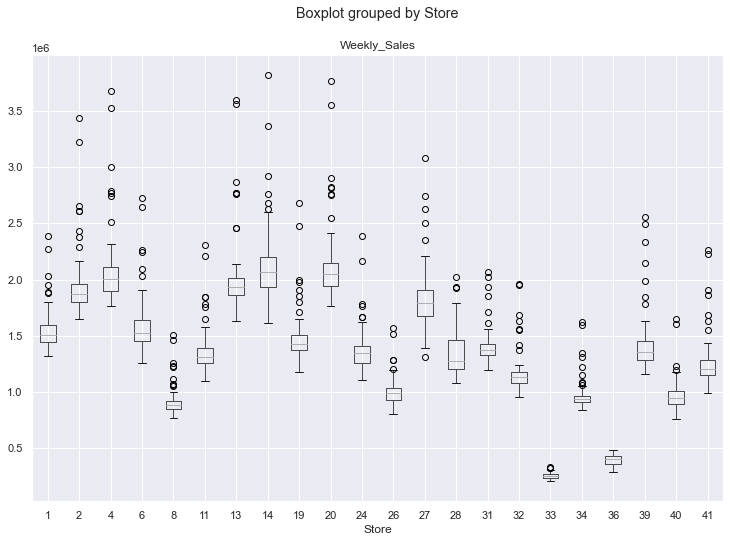

In [21]:
df_A = df_2010_11_total_sales[df_2010_11_total_sales['Type'] == "A"]
df_A.boxplot(column="Weekly_Sales", by="Store")

# Store B

<AxesSubplot:title={'center':'Weekly_Sales'}, xlabel='Store'>

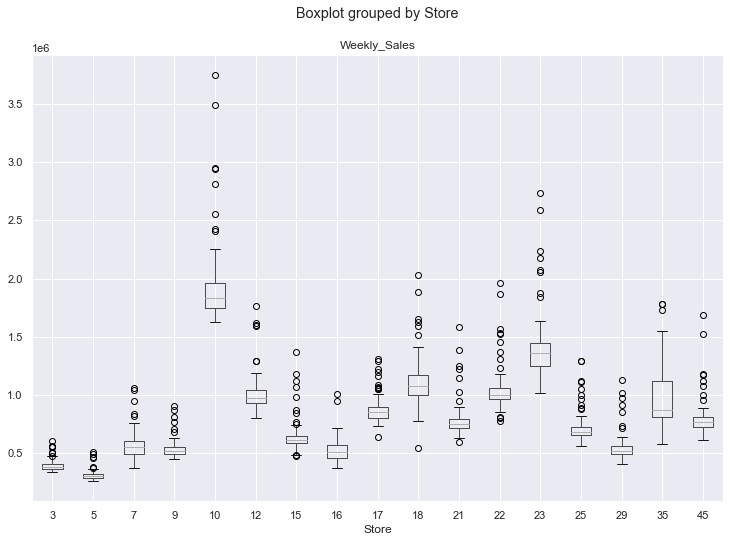

In [24]:
df_B = df_2010_11_total_sales[df_2010_11_total_sales['Type'] == "B"]
df_B.boxplot(column="Weekly_Sales", by="Store")

# Store C

<AxesSubplot:title={'center':'Weekly_Sales'}, xlabel='Store'>

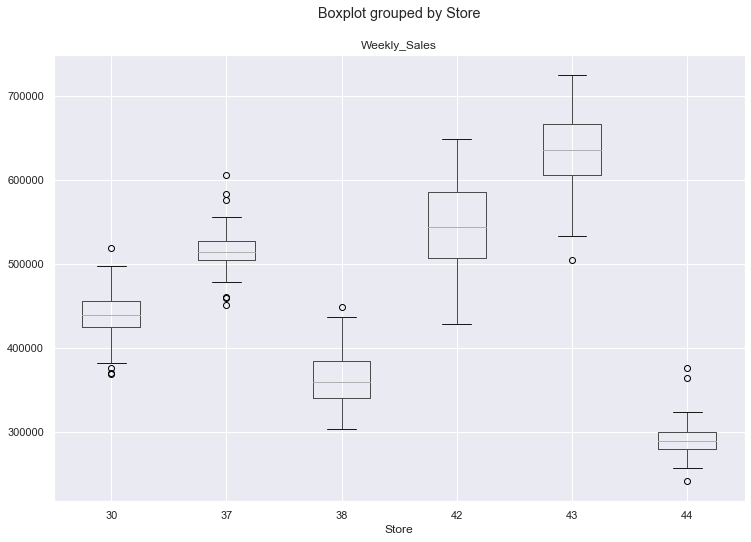

In [26]:
df_B = df_2010_11_total_sales[df_2010_11_total_sales['Type'] == "C"]
df_B.boxplot(column="Weekly_Sales", by="Store")

# Groupby Department to check for any possible effects across a selection of departments.

## Observations:
* Although there is some variation by department when using all data points in this way, this variation is relatively small.
* Departmental differences are likley to be more noticeable when holidays/seasons are taken into consideration. 

In [32]:
df_2010_11.reset_index(inplace=True)

df_total_sales_dept = df_2010_11.groupby(['Store', 'Date'])\
["Weekly_Sales"].sum().reset_index().join(df_2010_11.drop(\
["Date", "Store", "Weekly_Sales"], axis=1).drop_duplicates().reset_index(),
                                          lsuffix='_caller')

<AxesSubplot:title={'center':'Weekly_Sales'}, xlabel='Dept'>

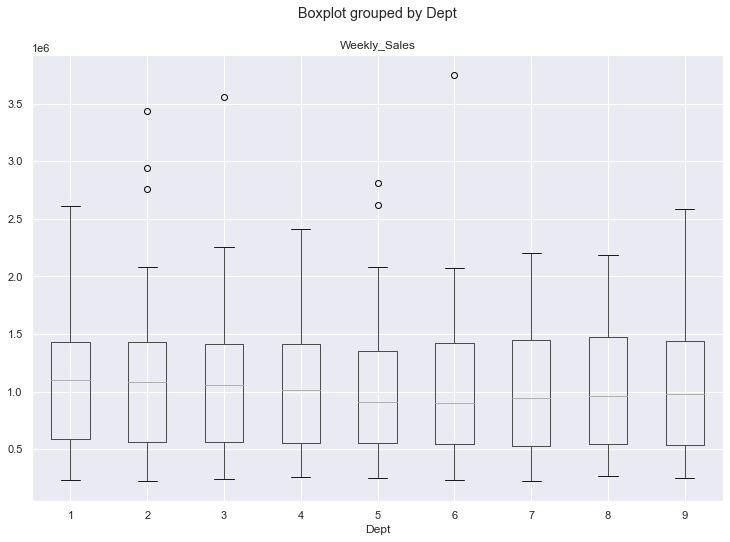

In [33]:
df_dept1 = df_total_sales_dept[df_total_sales_dept['Dept'].isin([1,2,3,4,5,6,7,8,9])]
df_dept1.boxplot(column="Weekly_Sales", by="Dept")

<AxesSubplot:title={'center':'Weekly_Sales'}, xlabel='Dept'>

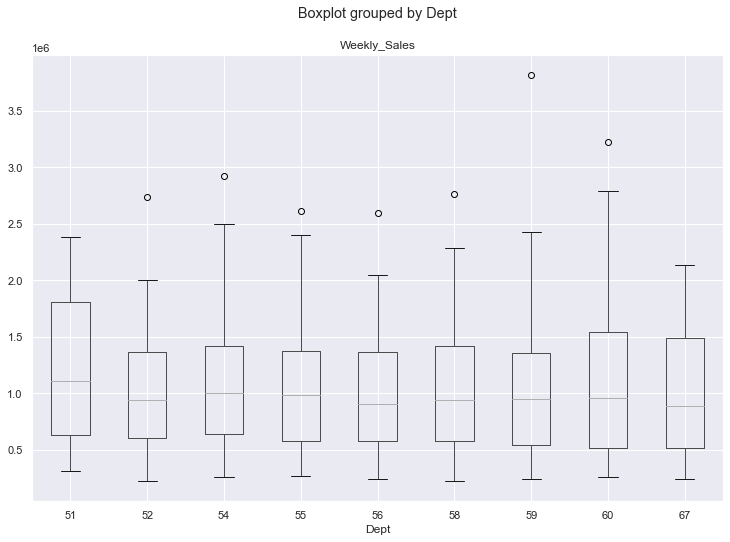

In [34]:
df_dept2 = df_total_sales_dept[df_total_sales_dept['Dept'].isin([50,51,52,53,54,55,56,57,58,59,60,67])]
df_dept2.boxplot(column="Weekly_Sales", by="Dept")

# Check how Weekly-Sales may be impacted by features such as Temperature, IsHoliday and Fuel_Price

## Selected plots below.

## Department 3 sees some increase in high temperatures.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

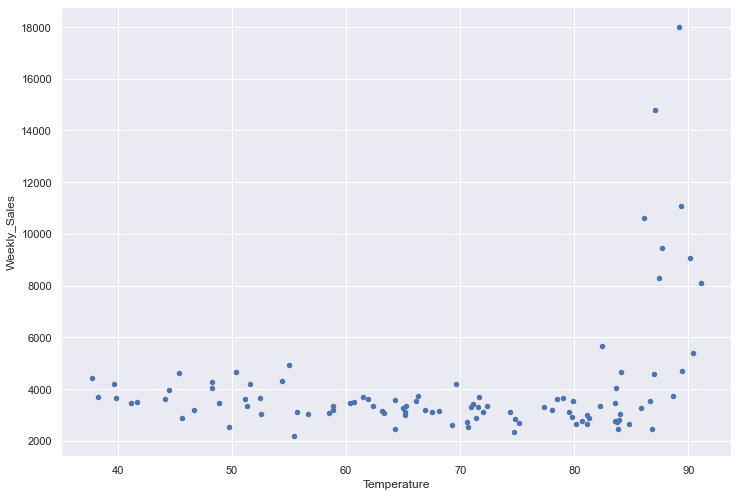

In [35]:
df_2010_11["IsHoliday"] = df_2010_11["IsHoliday"].astype(int)

df_2 = df_2010_11[df_2010_11['Store']==5]
df_2 = df_2[df_2["Dept"] == 3]

df_2.plot.scatter(x="Temperature", y="Weekly_Sales")

# department 8 exhibits strong negative correlation across multiple stores.
## -0.542 for Store 2

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

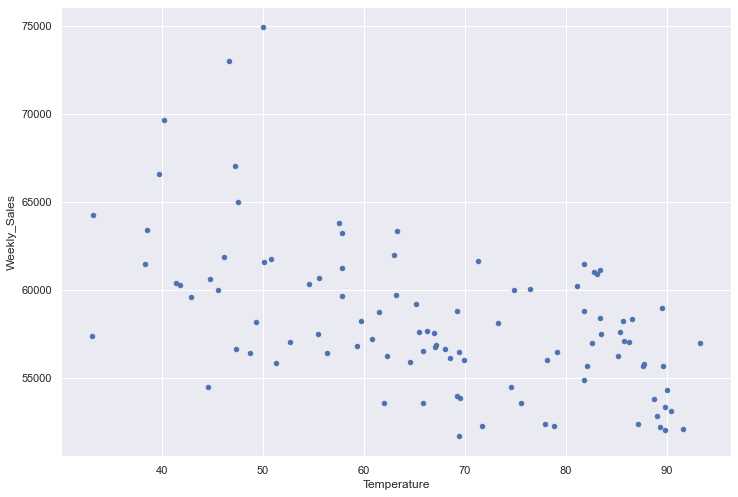

In [38]:
df_2 = df_2010_11[df_2010_11['Store']==2]
df_2 = df_2[df_2["Dept"] == 8]

df_2.plot.scatter(x="Temperature", y="Weekly_Sales")

In [39]:
df_corr = df_2[["Date","Fuel_Price","Dept","Weekly_Sales","Temperature", "IsHoliday"]]
df_corr.corr()

,Fuel_Price,Dept,Weekly_Sales,Temperature,IsHoliday
Fuel_Price,1.000000,NaN,-0.394268,0.213325,-0.078991
Dept,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,-0.394268,NaN,1.000000,-0.541920,0.004457
Temperature,0.213325,NaN,-0.541920,1.000000,-0.222867
IsHoliday,-0.078991,NaN,0.004457,-0.222867,1.000000


# Department 12 exhibits strong negative correlation across multiple stores.
## 0.596 for Store 4

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

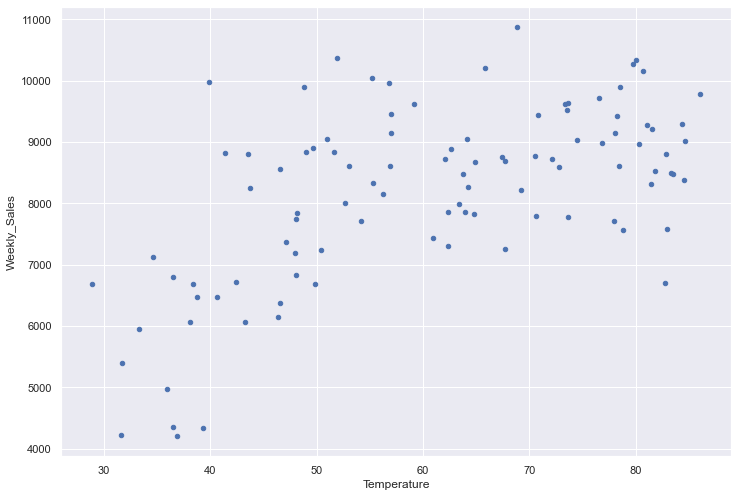

In [42]:
df_2 = df_2010_11[df_2010_11['Store']==4]
df_2 = df_2[df_2["Dept"] == 12]

df_2.plot.scatter(x="Temperature", y="Weekly_Sales")

In [43]:
df_corr = df_2[["Date","Fuel_Price","Dept","Weekly_Sales","Temperature", "IsHoliday"]]
df_corr.corr()

,Fuel_Price,Dept,Weekly_Sales,Temperature,IsHoliday
Fuel_Price,1.000000,NaN,0.024206,0.275543,-0.076757
Dept,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,0.024206,NaN,1.000000,0.596123,-0.239635
Temperature,0.275543,NaN,0.596123,1.000000,-0.241525
IsHoliday,-0.076757,NaN,-0.239635,-0.241525,1.000000


# Strong Negative correlation between Weekly_Sales and Fuel Price

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

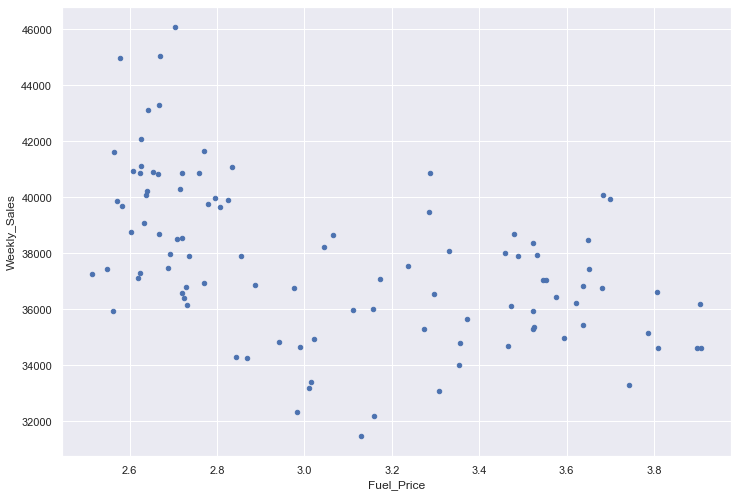

In [44]:
df_2 = df_2010_11[df_2010_11['Store']==6]
df_2 = df_2[df_2["Dept"] == 13]
df_2.plot.scatter(x="Fuel_Price", y="Weekly_Sales")

,Fuel_Price,Dept,Weekly_Sales,Temperature,IsHoliday
Fuel_Price,1.000000,NaN,-0.476095,0.291557,-0.078991
Dept,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,-0.476095,NaN,1.000000,0.353329,-0.111602
Temperature,0.291557,NaN,0.353329,1.000000,-0.217002
IsHoliday,-0.078991,NaN,-0.111602,-0.217002,1.000000


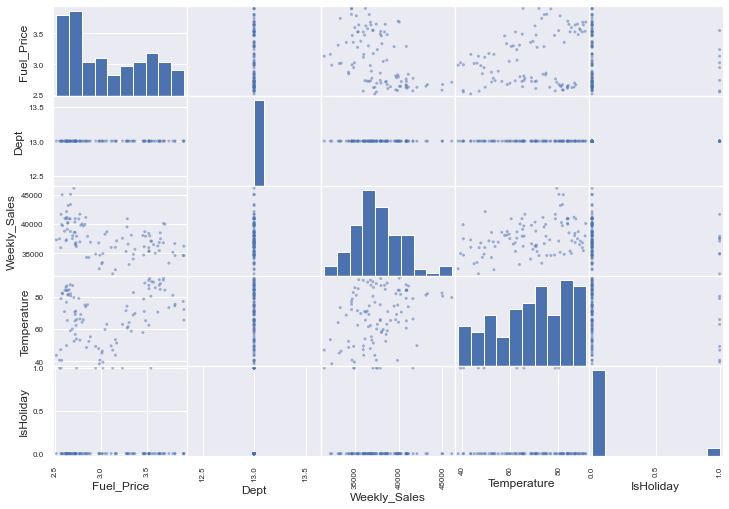

In [46]:
df_corr = df_2[["Date","Fuel_Price","Dept","Weekly_Sales","Temperature", "IsHoliday"]]
axl = pd.plotting.scatter_matrix(df_corr, hist_kwds={'bins':10})
df_corr.corr()

# Seasonality

## Plotting seasonality and trend for each store type for the 2-year period.

# Small downward trend throughout 2010-2011
# Anticipated spikes around thanksgiving and christmas.

# Store A

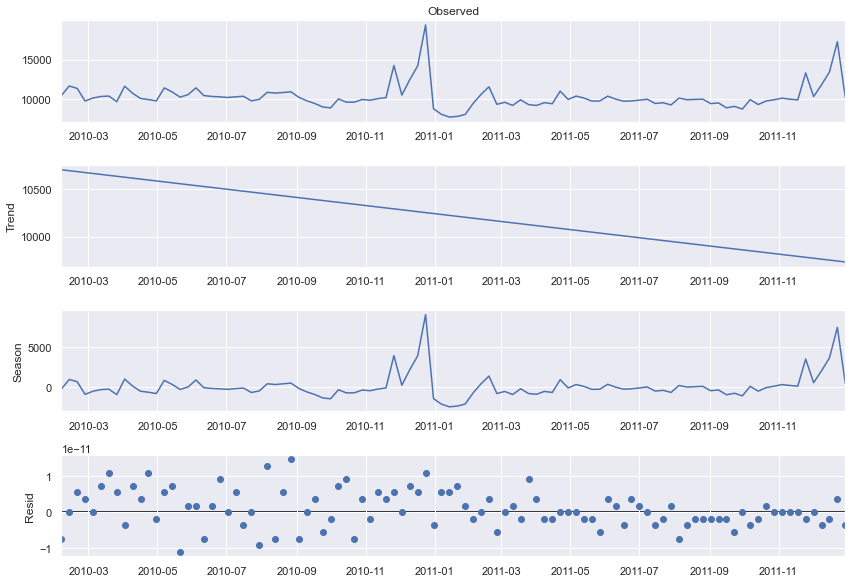

In [38]:
df_2010_11_SEAS = df_2010_11[["Weekly_Sales", "Store", "Type", "Date"]]
df_2010_11_SEAS = df_2010_11_SEAS[df_2010_11_SEAS['Type'] == "A"]
df_2010_11_SEAS = df_2010_11_SEAS.groupby("Date").median()
df_2010_11_SEAS = df_2010_11_SEAS.drop("Store", axis=1)


stl = STL(df_2010_11_SEAS, period=52)
res = stl.fit()
fig = res.plot()

# Similar observed seasonality for Store type B

# Store B

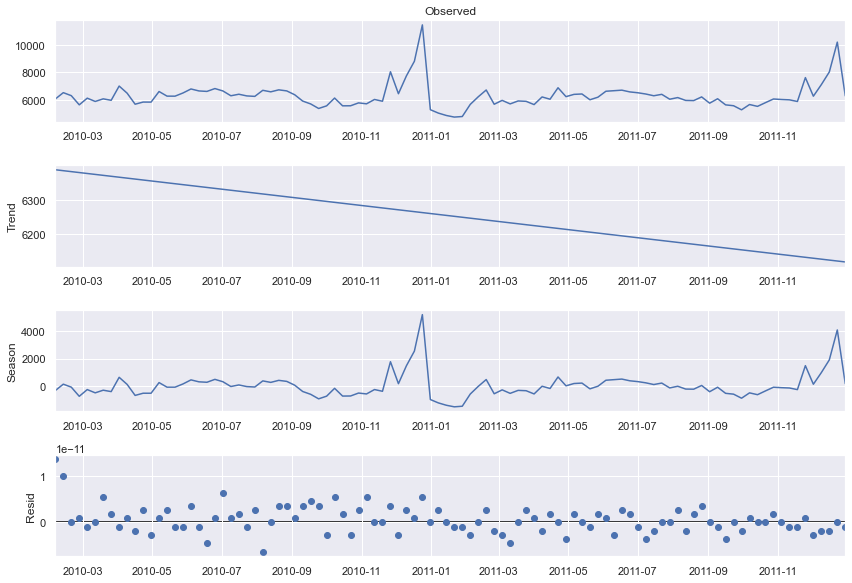

In [40]:
df_2010_11_SEAS = df_2010_11[["Weekly_Sales", "Store", "Type", "Date"]]
df_2010_11_SEAS = df_2010_11_SEAS[df_2010_11_SEAS['Type'] == "B"]
df_2010_11_SEAS = df_2010_11_SEAS.groupby("Date").median()
df_2010_11_SEAS = df_2010_11_SEAS.drop("Store", axis=1)


stl = STL(df_2010_11_SEAS, period=52)
res = stl.fit()
fig = res.plot()

# Store C - Seasonality a little less clear, as there are more spikes throughout the earlier part of the year

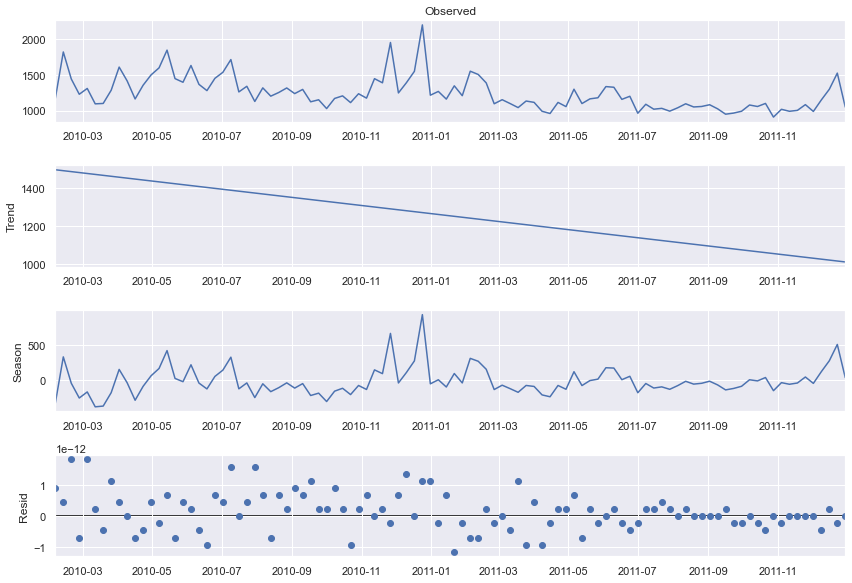

In [42]:
df_2010_11_SEAS = df_2010_11[["Weekly_Sales", "Store", "Type", "Date"]]
df_2010_11_SEAS = df_2010_11_SEAS[df_2010_11_SEAS['Type'] == "C"]
df_2010_11_SEAS = df_2010_11_SEAS.groupby("Date").median()
df_2010_11_SEAS = df_2010_11_SEAS.drop("Store", axis=1)


stl = STL(df_2010_11_SEAS, period=52)
res = stl.fit()
fig = res.plot()

# Some statistical tests were applied to understand stationarity effects.

In [3]:
adfuller(df_2010_11['Weekly_Sales'], regression='nc')

(-4.701562024403536,
 3.96843813460914e-06,
 89,
 294042,
 {'1%': -2.565747603717615,
  '5%': -1.941000913513864,
  '10%': -1.6168190967590672},
 6604451.819459312)

# P-value below 0.01, can reject the null hypothesis that the data is non-stationary with non-zero mean
* Indicates stationarity

In [4]:
kpss(df_2010_11['Weekly_Sales'],regression='c', nlags='auto')

C:\Users\EN0101\Anaconda3\envs\greykite-venv\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


(9.224014840887438,
 0.01,
 239,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# p-value of 0.01, Reject null hypothesis, data is non-stationary around a trend. This means the time series is not trend stationary.

## KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. 
## Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

# -----------------------------------------------------------------------------------

# Plot autocorrelation to understand if there are any significant seasonal effects in the weekly data. This is done for each Store Type

## Lag = 52 implemented to check for yearly seasonality.

# Store A - ignificant autocorrelation at lag 52, indicating annual seasonality for Store Type A

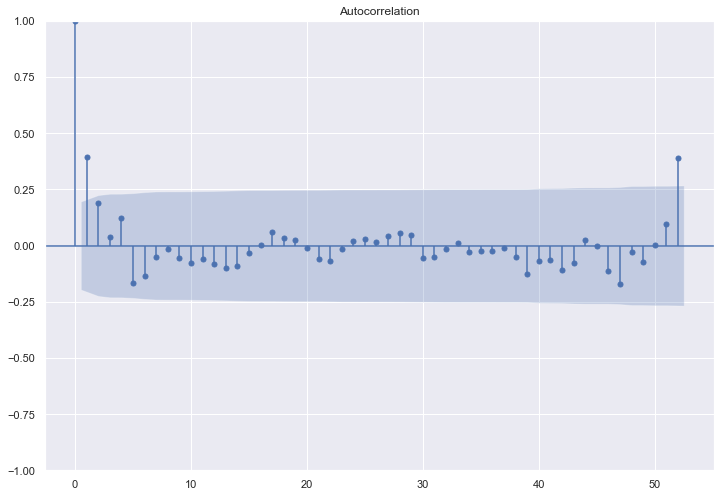

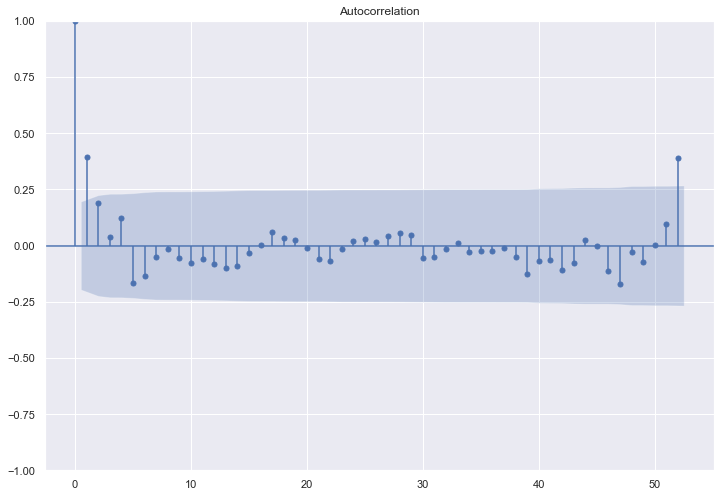

In [11]:
df_2010_11_SEAS_A = df_2010_11[["Weekly_Sales", "Store", "Type", "Date"]]
df_2010_11_SEAS_A = df_2010_11_SEAS_A[df_2010_11_SEAS_A['Type'] == "A"]
df_2010_11_SEAS_A = df_2010_11_SEAS_A.groupby("Date").median()
df_2010_11_SEAS_A = df_2010_11_SEAS_A.drop("Store", axis=1)

plot_acf(df_2010_11_SEAS_A, lags=52)

# Store B

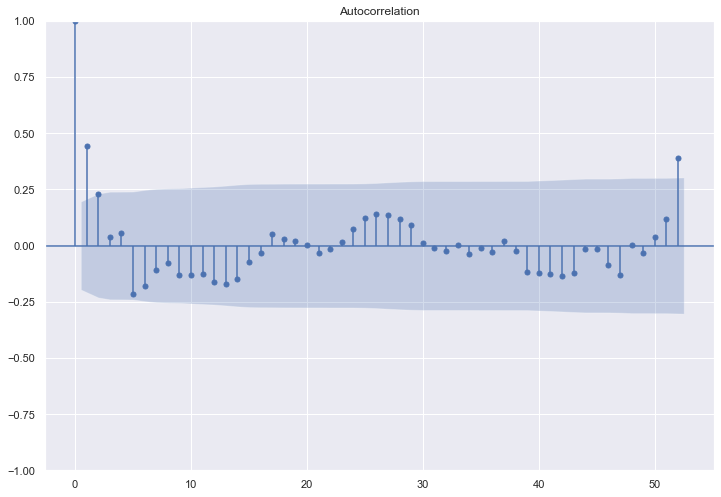

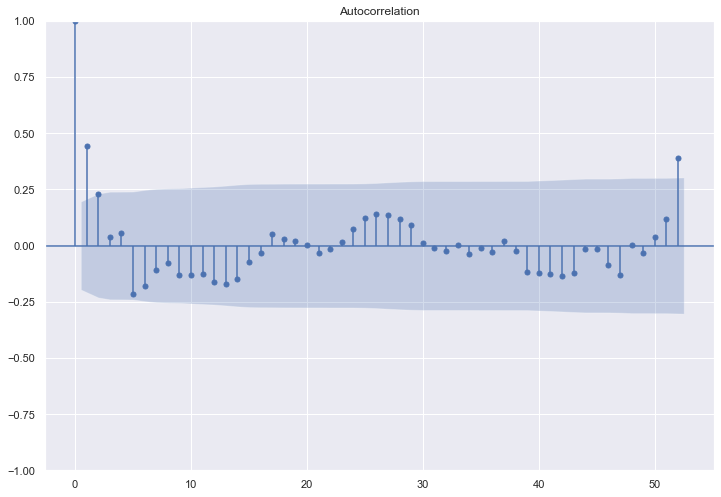

In [12]:
df_2010_11_SEAS_B = df_2010_11[["Weekly_Sales", "Store", "Type", "Date"]]
df_2010_11_SEAS_B = df_2010_11_SEAS_B[df_2010_11_SEAS_B['Type'] == "B"]
df_2010_11_SEAS_B = df_2010_11_SEAS_B.groupby("Date").median()
df_2010_11_SEAS_B = df_2010_11_SEAS_B.drop("Store", axis=1)

plot_acf(df_2010_11_SEAS_B, lags=52)

# Store C - No significant yearly seasonality indicated here.

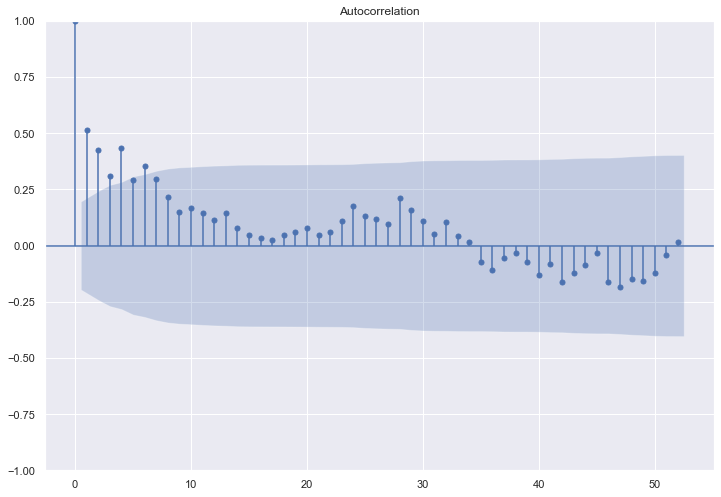

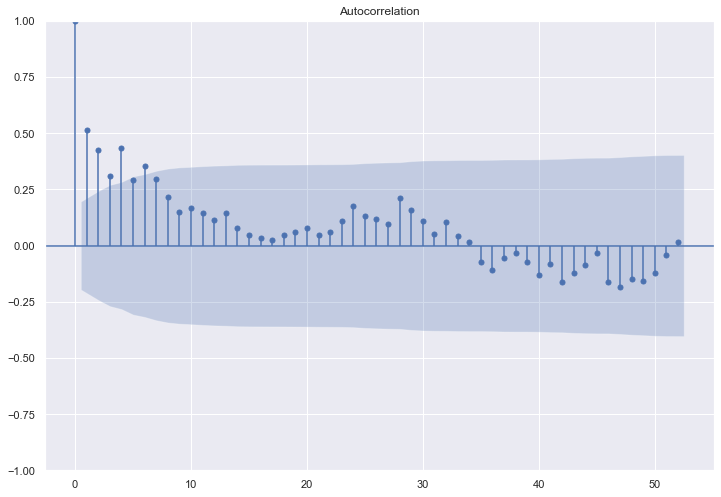

In [13]:
df_2010_11_SEAS_C = df_2010_11[["Weekly_Sales", "Store", "Type", "Date"]]
df_2010_11_SEAS_C = df_2010_11_SEAS_C[df_2010_11_SEAS_C['Type'] == "C"]
df_2010_11_SEAS_C = df_2010_11_SEAS_C.groupby("Date").median()
df_2010_11_SEAS_C = df_2010_11_SEAS_C.drop("Store", axis=1)

plot_acf(df_2010_11_SEAS_C, lags=52)

# Structural Breaks - Change Point Detection

In [14]:
def plot_bkps(ts, pen, model, day=''):
    for i in range(1, pen+1):
        pred_bkps = model.predict(n_bkps=i)
        fig,ax = rpt.display(ts, pred_bkps)
        ax[0].set_title('{}: Break Points: {}'.format(day, i))
        
        print(pred_bkps)

# Apparent structural change between years 1 and 2 for Store A

[50, 100]


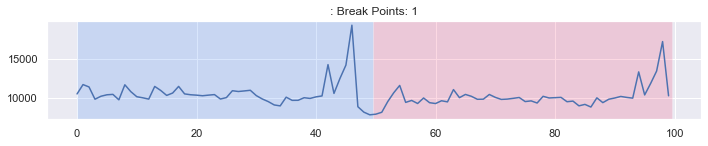

In [17]:
full_breaks = rpt.Window(width=10, model='l2' ,min_size=5).fit(df_2010_11_SEAS_A.to_numpy())

plot_bkps(df_2010_11_SEAS_A.to_numpy(), 1, full_breaks)

# Apparent structural change between years 1 and 2 for Store B

[50, 100]


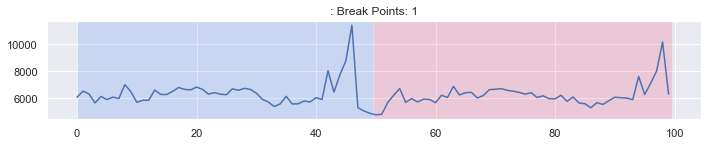

In [18]:
full_breaks = rpt.Window(width=10, model='l2' ,min_size=5).fit(df_2010_11_SEAS_B.to_numpy())

plot_bkps(df_2010_11_SEAS_B.to_numpy(), 1, full_breaks)

# For Store C, structural change occurs before the end of 2010 thanksgiving and christmas seasons.

[40, 100]


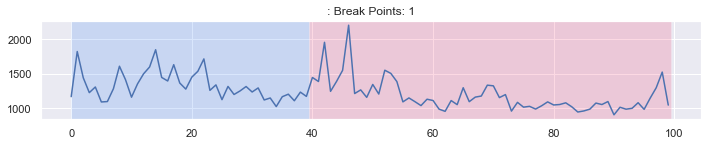

In [19]:
full_breaks = rpt.Window(width=10, model='l2' ,min_size=5).fit(df_2010_11_SEAS_C.to_numpy())

plot_bkps(df_2010_11_SEAS_C.to_numpy(), 1, full_breaks)

In [20]:
def plot_sbp(result, data):
    # plots data mean pre and post break point
    
    mn = data.index[0]
    mx = data.index[-1]

    loc = pd.to_datetime(result.cp)
    mu1 = result.avg.mu1
    mu2 = result.avg.mu2

    plt.figure(figsize=(16,6))
    plt.plot(data, label="Claim Clount")
    plt.hlines(mu1, xmin=mn, xmax=loc, linestyles='--', colors='orange',lw=1.5, label='mu1 : ' + str(round(mu1,2)))
    plt.hlines(mu2, xmin=loc, xmax=mx, linestyles='--', colors='g', lw=1.5, label='mu2 : ' + str(round(mu2,2)))
    plt.axvline(x=loc, linestyle='-.' , color='red', lw=1.5, label='Change point : '+ str(loc) + '\n p-value : ' + str(result.p))

    plt.title('Daily Claims')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend(loc='upper right')

# Pettitt to further evaluate change point

# Most significant for store A and C

In [33]:
df_2010_11 = pd.read_csv("../data/wrangled_data/df_2010_11.csv")
df_2010_11['Date'] = pd.to_datetime(df_2010_11["Date"], format="%Y/%m/%d")

In [34]:
df_2010_11_SEAS = df_2010_11[["Weekly_Sales", "Store", "Type", "Date"]]
df_2010_11_SEAS = df_2010_11_SEAS[df_2010_11_SEAS['Type'] == "A"]
df_2010_11_SEAS = df_2010_11_SEAS.groupby("Date").median()
df_2010_11_SEAS = df_2010_11_SEAS.drop("Store", axis=1)

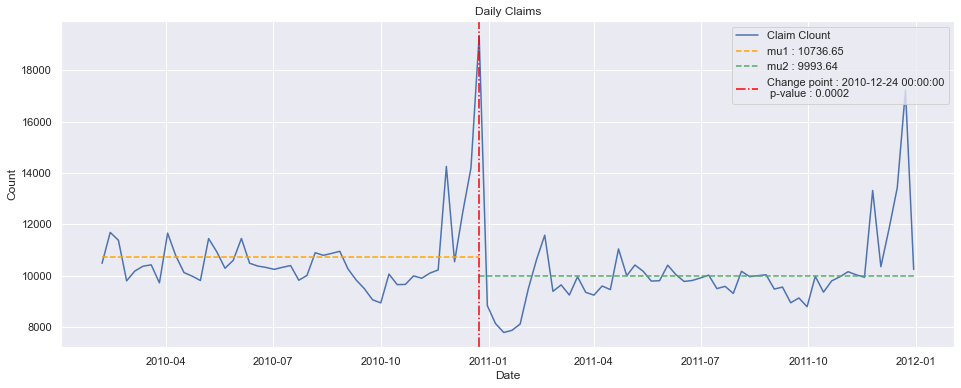

In [35]:
sat_pt = hg.pettitt_test(df_2010_11_SEAS)
plot_sbp(sat_pt, df_2010_11_SEAS)

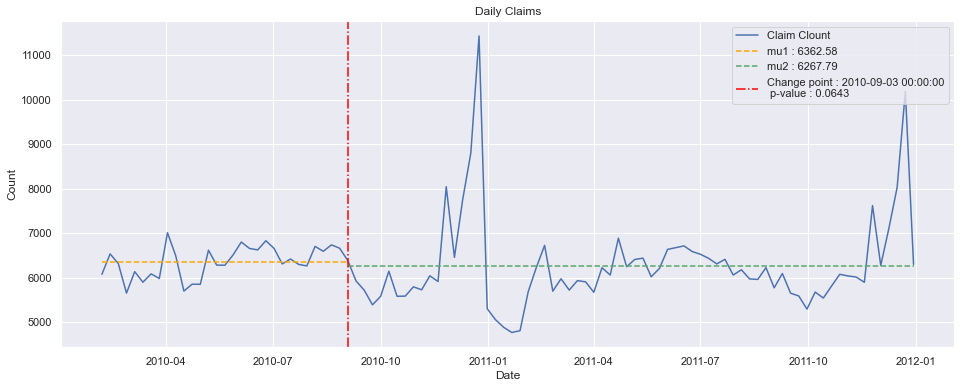

In [29]:
df_2010_11_SEAS = df_2010_11[["Weekly_Sales", "Store", "Type", "Date"]]
df_2010_11_SEAS = df_2010_11_SEAS[df_2010_11_SEAS['Type'] == "B"]
df_2010_11_SEAS = df_2010_11_SEAS.groupby("Date").median()
df_2010_11_SEAS = df_2010_11_SEAS.drop("Store", axis=1)
df_2010_11_SEAS


sat_pt = hg.pettitt_test(df_2010_11_SEAS)
plot_sbp(sat_pt, df_2010_11_SEAS)

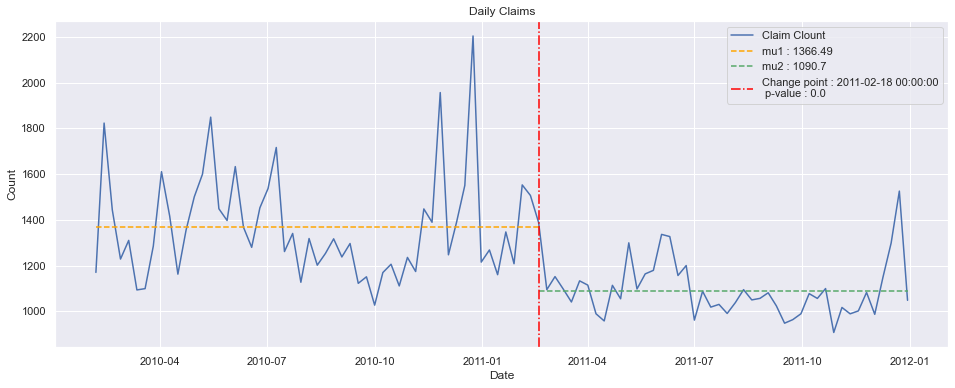

In [36]:
df_2010_11_SEAS = df_2010_11[["Weekly_Sales", "Store", "Type", "Date"]]
df_2010_11_SEAS = df_2010_11_SEAS[df_2010_11_SEAS['Type'] == "C"]
df_2010_11_SEAS = df_2010_11_SEAS.groupby("Date").median()
df_2010_11_SEAS = df_2010_11_SEAS.drop("Store", axis=1)
df_2010_11_SEAS


sat_pt = hg.pettitt_test(df_2010_11_SEAS)
plot_sbp(sat_pt, df_2010_11_SEAS)